## Prepare a classification model using SVM for salary data 

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

In [70]:
train_data=pd.read_csv("/content/SalaryData_Train(1).csv")
test_data=pd.read_csv("/content/SalaryData_Test(1).csv")

In [71]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [72]:
train_data.shape

(30161, 14)

In [73]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [74]:
train_data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [75]:
colum_data= list(train_data.columns[(train_data.dtypes=='object')][0:-1])

In [76]:
colum_data

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [77]:
LE=LabelEncoder()

In [78]:
for i in colum_data:
  train_data[i]=LE.fit_transform(train_data[i])
  test_data[i]=LE.fit_transform(test_data[i])

In [79]:
train_data.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K


In [80]:
test_data.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K


In [82]:
mapping = {' >50K': 1, ' <=50K': 2}

In [83]:
train_data = train_data.replace({'Salary': mapping})
test_data = test_data.replace({'Salary': mapping})

In [84]:
train_data.Salary.value_counts()

2    22653
1     7508
Name: Salary, dtype: int64

In [85]:
df= pd.concat([train_data,test_data],axis=0)

In [87]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,2
1,50,4,9,13,2,3,0,4,1,0,0,13,37,2
2,38,2,11,9,0,5,1,4,1,0,0,40,37,2
3,53,2,1,7,2,5,0,2,1,0,0,40,37,2
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2


In [88]:
df.shape

(45221, 14)

In [89]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [90]:
df.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.085890,-0.003497,0.037623,-0.271616,-0.004474,-0.247561,0.023781,0.082040,0.079682,0.059426,0.101992,-0.002879,-0.237035
workclass,0.085890,1.000000,0.017852,0.040778,-0.033217,0.017508,-0.065048,0.049767,0.069633,0.034542,0.008261,0.051366,0.003889,-0.015657
education,-0.003497,0.017852,1.000000,0.347451,-0.041547,-0.033500,-0.013190,0.011446,-0.027531,0.029893,0.016740,0.060890,0.078800,-0.081214
educationno,0.037623,0.040778,0.347451,1.000000,-0.064986,0.089686,-0.088431,0.031655,0.003416,0.126907,0.081741,0.146206,0.094125,-0.332801
maritalstatus,-0.271616,-0.033217,-0.041547,-0.064986,1.000000,0.016399,0.180430,-0.070311,-0.119982,-0.042397,-0.034940,-0.183178,-0.022880,0.192701
occupation,-0.004474,0.017508,-0.033500,0.089686,0.016399,1.000000,-0.051644,-0.000026,0.056626,0.019435,0.015271,0.016160,-0.002628,-0.049788
relationship,-0.247561,-0.065048,-0.013190,-0.088431,0.180430,-0.051644,1.000000,-0.118588,-0.582977,-0.056817,-0.058485,-0.259194,-0.007016,0.253399
race,0.023781,0.049767,0.011446,0.031655,-0.070311,-0.000026,-0.118588,1.000000,0.088949,0.014079,0.020917,0.044739,0.126192,-0.070849
sex,0.082040,0.069633,-0.027531,0.003416,-0.119982,0.056626,-0.582977,0.088949,1.000000,0.047441,0.046639,0.231427,-0.004653,-0.215748
capitalgain,0.079682,0.034542,0.029893,0.126907,-0.042397,0.019435,-0.056817,0.014079,0.047441,1.000000,-0.032095,0.083880,0.007641,-0.221033


In [91]:
train_data.duplicated().sum()

3258

In [92]:
test_data.duplicated().sum()

930

In [93]:
train_data.shape

(30161, 14)

In [94]:
train_data.drop_duplicates(inplace=True)

In [95]:
test_data.drop_duplicates(inplace=True)

In [96]:
train_data.shape

(26903, 14)

In [97]:
test_data.shape

(14130, 14)

In [98]:
df.duplicated().sum()

5982

In [99]:
df.drop_duplicates(inplace=True)

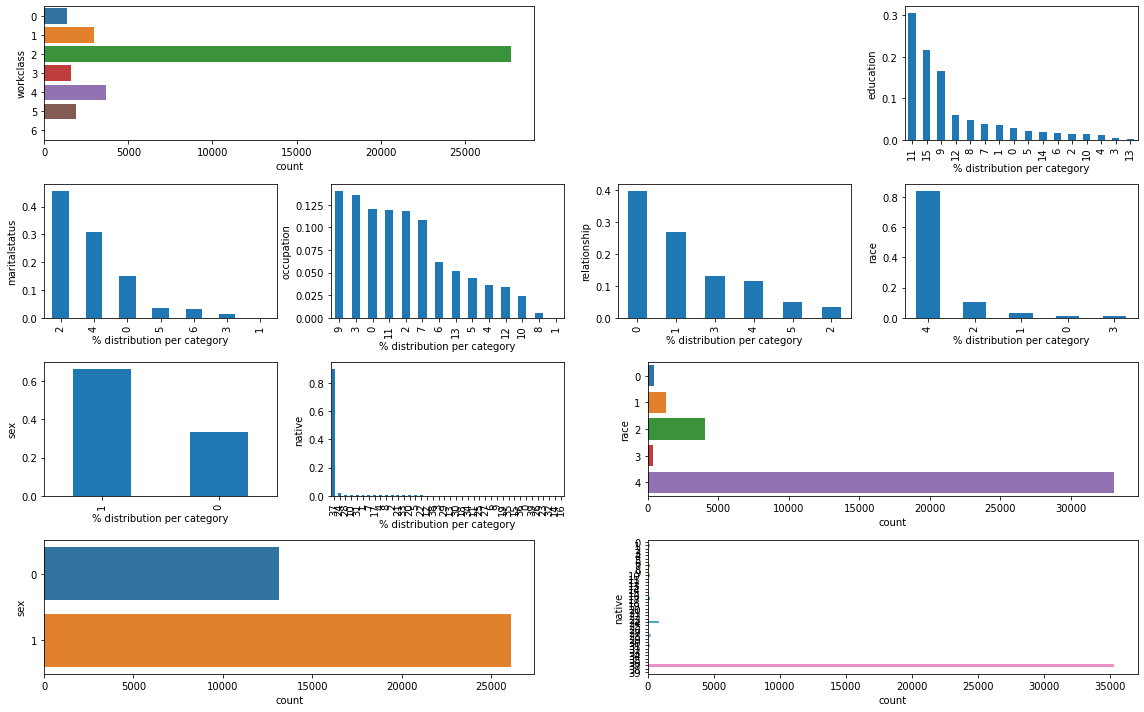

In [100]:
plt.figure(figsize=(16,10))
for i,col in enumerate(colum_data,1):
    plt.subplot(4,2,i)
    sns.countplot(data=df,y=col)
    plt.subplot(4,4,i+2)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

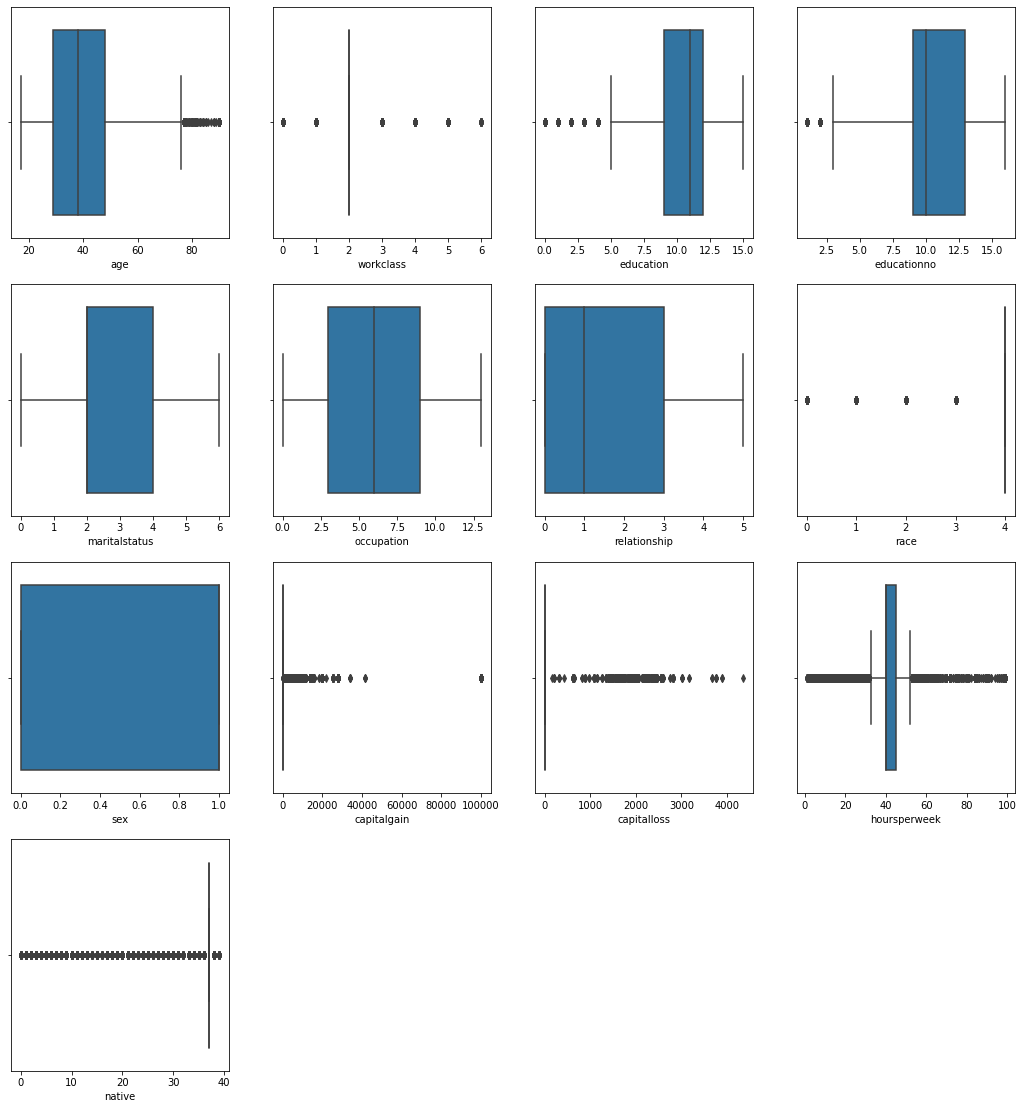

In [101]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(18,40))
for i ,col in enumerate(df.columns[0:-1]):
  plt.subplot(8,4,i+1)
  sns.boxplot(df[col])
plt.show()

## SVM Model Building

In [102]:
X_train=train_data.iloc[:,:-1]
y_train=train_data.iloc[:,-1]
X_test=test_data.iloc[:,:-1]
y_test=test_data.iloc[:,-1]

In [103]:
X_train.shape

(26903, 13)

In [104]:
y_train.value_counts()

2    20023
1     6880
Name: Salary, dtype: int64

In [105]:
mn=MinMaxScaler()

In [106]:
X_train=mn.fit_transform(X_train)
X_test=mn.fit_transform(X_test)

## 1. Using Linear

In [107]:
li_model=SVC(kernel="linear")

In [108]:
li_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [109]:
y_pred= li_model.predict(X_test)

In [110]:
accuracy_score(y_test,y_pred)

0.8041047416843595

### 2. Using Poly

In [111]:
poly_model=SVC(kernel="poly")
poly_model.fit(X_train,y_train)
y_pred= poly_model.predict(X_test)

In [112]:
accuracy_score(y_test,y_pred)

0.8421089879688606

### 3. RBF

In [113]:
rbf_model=SVC(kernel="rbf")
rbf_model.fit(X_train,y_train)
y_pred= rbf_model.predict(X_test)

In [114]:
accuracy_score(y_test,y_pred)

0.8410474168435952

### 4. Sigmoid

In [115]:
sig_model=SVC(kernel="sigmoid")
sig_model.fit(X_train,y_train)
y_pred= sig_model.predict(X_test)

In [116]:
accuracy_score(y_test,y_pred)

0.57310686482661

In [131]:
accs= [accuracy_score(y_test,li_model.predict(X_test)),accuracy_score(y_test,poly_model.predict(X_test)),accuracy_score(y_test,rbf_model.predict(X_test)),accuracy_score(y_test,y_pred)]

In [132]:
Results=pd.DataFrame({"Model":["Linear","Poly",'RBF','Sigmoid'],'Accuracy':accs})

In [133]:
Results['Accuracy']=Results['Accuracy'].apply(lambda x: str(round(x*100,2)) + " %")

In [134]:
Results

,Model,Accuracy
0,Linear,80.41 %
1,Poly,84.21 %
2,RBF,84.1 %
3,Sigmoid,57.31 %


## Conclusion: Polynomial Model gave the most accuracy with 84.21%